In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

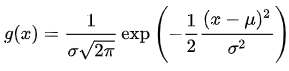

In [6]:
np.power

<ufunc 'power'>

In [7]:
def gaussian(x,mu,sigma):
    return 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-np.power((x - mu)/sigma,2)/2)


In [8]:
height = np.hstack((np.arange(120,130,0.35), 
                    np.arange(130,140,0.25), 
                    np.arange(140,170,0.15), 
                    np.arange(170,180,0.25), 
                    np.arange(180,191,0.35)))

In [9]:
height

array([120.  , 120.35, 120.7 , 121.05, 121.4 , 121.75, 122.1 , 122.45,
       122.8 , 123.15, 123.5 , 123.85, 124.2 , 124.55, 124.9 , 125.25,
       125.6 , 125.95, 126.3 , 126.65, 127.  , 127.35, 127.7 , 128.05,
       128.4 , 128.75, 129.1 , 129.45, 129.8 , 130.  , 130.25, 130.5 ,
       130.75, 131.  , 131.25, 131.5 , 131.75, 132.  , 132.25, 132.5 ,
       132.75, 133.  , 133.25, 133.5 , 133.75, 134.  , 134.25, 134.5 ,
       134.75, 135.  , 135.25, 135.5 , 135.75, 136.  , 136.25, 136.5 ,
       136.75, 137.  , 137.25, 137.5 , 137.75, 138.  , 138.25, 138.5 ,
       138.75, 139.  , 139.25, 139.5 , 139.75, 140.  , 140.15, 140.3 ,
       140.45, 140.6 , 140.75, 140.9 , 141.05, 141.2 , 141.35, 141.5 ,
       141.65, 141.8 , 141.95, 142.1 , 142.25, 142.4 , 142.55, 142.7 ,
       142.85, 143.  , 143.15, 143.3 , 143.45, 143.6 , 143.75, 143.9 ,
       144.05, 144.2 , 144.35, 144.5 , 144.65, 144.8 , 144.95, 145.1 ,
       145.25, 145.4 , 145.55, 145.7 , 145.85, 146.  , 146.15, 146.3 ,
      

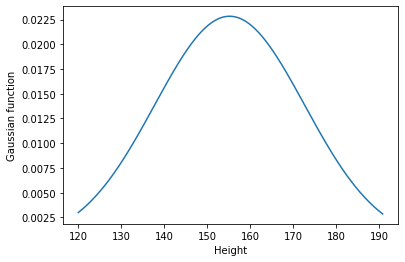

In [10]:
mu = np.mean(height)
sigma = np.std(height)
g = [gaussian(i,mu,sigma) for i in height]
plt.plot(height,g)
plt.xlabel('Height')
plt.ylabel("Gaussian function")
plt.show()

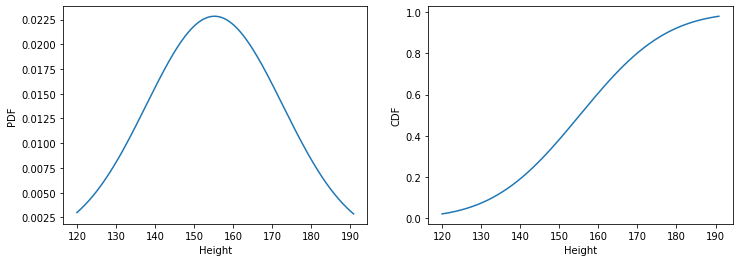

In [11]:
plt.figure(figsize=(12,4))
y_norm = stats.norm(mu, sigma)
g_stat = y_norm.pdf(height)
# PDF is probabilty distributed 
plt.subplot(121)
plt.plot(height,g_stat)
plt.xlabel('Height')
plt.ylabel("PDF")
plt.subplot(122)
c_stat = y_norm.cdf(height)
plt.plot(height,c_stat)
plt.xlabel('Height')
plt.ylabel("CDF")
# cumilited distributed
plt.show()

In [13]:
df = pd.read_excel('Social_Network_Ads_new.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Age        284 non-null    int64
 1   Salary     284 non-null    int64
 2   Purchased  284 non-null    int64
dtypes: int64(3)
memory usage: 6.7 KB


In [14]:
df['Purchased'].value_counts()

1    142
0    142
Name: Purchased, dtype: int64

In [20]:
df.corr()
# -1 to 1
# covariance and correlation

,Age,Salary,Purchased
Age,1.000000,0.098741,0.566638
Salary,0.098741,1.000000,0.340323
Purchased,0.566638,0.340323,1.000000


In [21]:
df.describe()

,Age,Salary,Purchased
count,284.000000,284.000000,284.000000
mean,40.746479,73535.211268,0.500000
std,10.196609,36214.254846,0.500883
min,18.000000,16000.000000,0.000000
25%,35.000000,43750.000000,0.000000
50%,40.000000,72000.000000,0.500000
75%,48.000000,96000.000000,1.000000
max,60.000000,150000.000000,1.000000


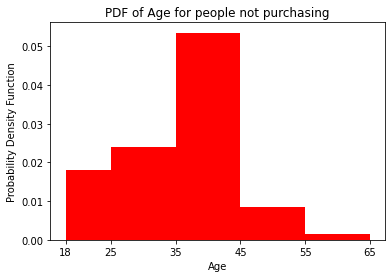

In [22]:
b = [18,25,35,45,55,65]
age = df.iloc[:,0].values
y = df.iloc[:,2].values

plt.hist(age[y==0], bins=b, color='r', density=True)
# these are the peoople who are not purchased
plt.xticks(b)
plt.xlabel('Age')
plt.ylabel("Probability Density Function")
plt.title("PDF of Age for people not purchasing")
plt.show()

# how histograms are made?
# 
# it creates a bins or buckets based on buckets how many elemts are belong to that buckets are drawn
# User define buckets are initialize in bins=[values]  inclusive    

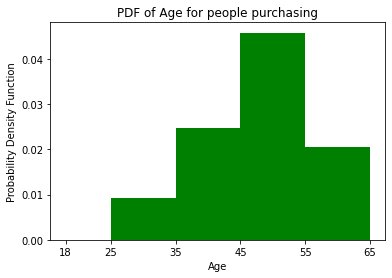

In [23]:
plt.hist(age[y==1], bins=b, color='g', density=True)
# people who purchased
plt.xticks(b)
plt.xlabel('Age')
plt.ylabel("Probability Density Function")
plt.title("PDF of Age for people purchasing")
plt.show()

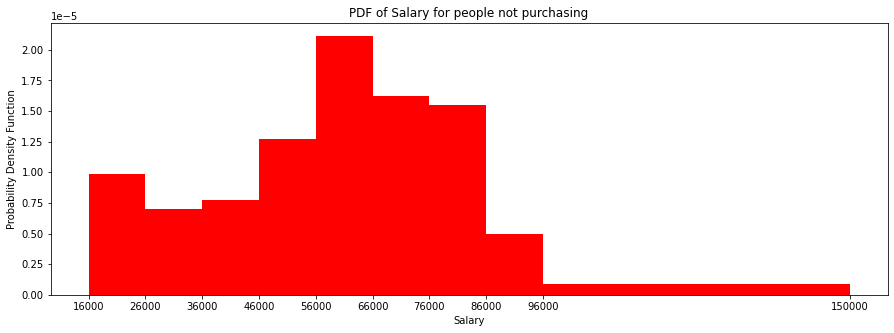

In [24]:
b = [16000,26000,36000,46000,56000,66000,76000,86000,96000,150000]
sal = df.iloc[:,1].values
y = df.iloc[:,2].values
plt.figure(figsize=(15,5))
plt.hist(sal[y==0], bins=b, color='r', density=True)
plt.xticks(b)
plt.xlabel('Salary')
plt.ylabel("Probability Density Function")
plt.title("PDF of Salary for people not purchasing")
plt.show()

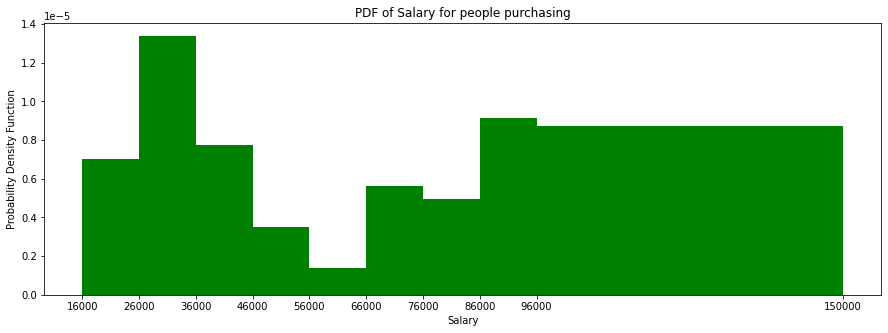

In [25]:
plt.figure(figsize=(15,5))
plt.hist(sal[y==1], bins=b, color='g', density=True)
plt.xticks(b)
plt.xlabel('Salary')
plt.ylabel("Probability Density Function")
plt.title("PDF of Salary for people purchasing")
plt.show()

In [26]:
# Chances of purchase given age =45 and salary is 100000
#np.log(prob of purchase) + np.log(Age=45|1) + np.log(Sal=100000|1)
np.log(0.5)+np.log(0.028)+ np.log(0.1*10**-5)

-18.08420850733115

In [27]:
# Chances of not purchase given age =45 and salary is 100000
#np.log(prob of not purchase) + np.log(Age=45|0) + np.log(Sal=100000|0)
np.log(0.5)+np.log(0.009)+ np.log(0.12 * 10**-5)

-19.03686688337618

In [28]:
X = df.iloc[:,[0,1]].values
y = df.iloc[:,2].values
print(X.shape, y.shape)

(284, 2) (284,)


In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [30]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [31]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, 
                                                    test_size = 0.20, 
                                                    random_state = 0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(227, 2) (57, 2) (227,) (57,)


In [33]:
from sklearn.naive_bayes import GaussianNB

In [34]:
model = GaussianNB()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8947368421052632

In [35]:
#age =45 and salary is 100000
test_instance = np.array([[45,100000]]).reshape(-1,2)
model.predict(sc.transform(test_instance))

array([1], dtype=int64)

In [36]:
msc = MinMaxScaler()
X_msc = msc.fit_transform(X)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_msc, y, 
                                                    test_size = 0.20, 
                                                    random_state = 0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(227, 2) (57, 2) (227,) (57,)


In [38]:
model = GaussianNB()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8947368421052632

In [39]:
#age =45 and salary is 100000
test_instance = np.array([[45,100000]]).reshape(-1,2)
model.predict(sc.transform(test_instance))

array([1], dtype=int64)

In [40]:
age_test = X_test[:,0]
sal_test = X_test[:,1]
X1, X2 = np.meshgrid(np.arange(age_test.min()-1, age_test.max()+1, 0.05),
           np.arange(sal_test.min()-1, sal_test.max()+1, 0.05))

In [41]:
print(X1.shape, X2.shape)

(60, 60) (60, 60)


In [42]:
test_instances = np.c_[X1.ravel(),X2.ravel()]
test_instances.shape

(3600, 2)

In [43]:
y_pred = model.predict(test_instances)

In [44]:
y_pred.shape

(3600,)

In [45]:
y_pred = y_pred.reshape(X1.shape)

In [46]:
y_pred.shape

(60, 60)

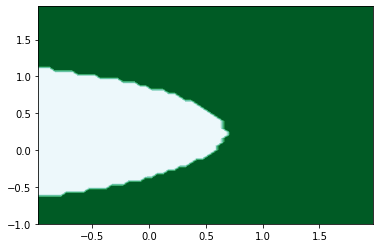

In [47]:
plt.contourf(X1, X2, y_pred, cmap=plt.cm.BuGn)
plt.show()

In [48]:
X_test

array([[0.47619048, 0.71641791],
       [0.33333333, 0.52238806],
       [0.88095238, 0.85074627],
       [0.69047619, 0.25373134],
       [0.83333333, 0.13432836],
       [0.71428571, 0.76865672],
       [0.83333333, 0.49253731],
       [0.78571429, 0.05223881],
       [0.04761905, 0.52238806],
       [0.71428571, 0.18656716],
       [0.19047619, 0.        ],
       [0.61904762, 0.91791045],
       [0.4047619 , 0.36567164],
       [0.47619048, 0.29104478],
       [0.23809524, 0.79850746],
       [0.92857143, 0.07462687],
       [0.73809524, 0.08955224],
       [0.61904762, 0.17164179],
       [0.14285714, 0.31343284],
       [0.45238095, 0.97014925],
       [0.5952381 , 0.87313433],
       [0.85714286, 0.68656716],
       [0.5       , 0.32089552],
       [0.52380952, 0.36567164],
       [0.88095238, 0.81343284],
       [0.52380952, 0.44029851],
       [0.69047619, 0.23134328],
       [0.47619048, 0.41044776],
       [0.80952381, 0.91044776],
       [1.        , 0.2238806 ],
       [0.

In [49]:
yp = model.predict(X_test)

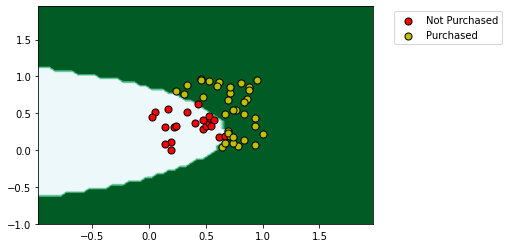

In [50]:
plt.contourf(X1, X2, y_pred, cmap=plt.cm.BuGn)
plt.scatter(X_test[yp==0,0],
            X_test[yp==0,1], s = 50, 
            color='r', edgecolor='k', label="Not Purchased")
plt.scatter(X_test[yp==1,0],
            X_test[yp==1,1], s = 50, 
            color='y', edgecolor='k', label="Purchased")
plt.legend(bbox_to_anchor=(1.4,1))
plt.show()

In [92]:
from sklearn.metrics import plot_confusion_matrix

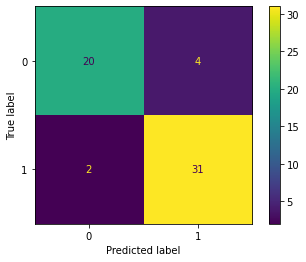

In [93]:
plot_confusion_matrix(model, X_test, y_test)